## Accunts classifications

In [500]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import time
from time import sleep
from time import process_time
from datetime import datetime
import itertools

#Preprocessamento
from sklearn import preprocessing
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_validate, cross_val_score


#Regressão Linear
from sklearn.linear_model import LinearRegression

#Avaliacao do Modelo
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from collections import Counter


#KNN
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions

#Decision Tree
from sklearn import tree
import graphviz

### Funções a serem usadas

In [20]:
def valueMetrics(y_test, y_predict):

    print('-------')
    print('Metrics')
    print('-------')

    print('Acurácia:', metrics.accuracy_score(y_test, y_predict))
    
    print('\n------------')
    print('Micro: Calcule métricas globalmente, contando o total de tp, fn e fp.')
    print('Micro: Calcule métricas para cada classe e encontre sua média não ponderada.')
    print('------------')
    
    print('\nPrecisão normal:', metrics.precision_score(y_test, y_predict))
    print('Precisão macro:', metrics.precision_score(y_test, y_predict, average='macro'))
    print('Precisão micro:', metrics.precision_score(y_test, y_predict, average='micro'))
    
    print('\nRecall normal:', metrics.recall_score(y_test, y_predict))
    print('\nRecall macro:', metrics.recall_score(y_test, y_predict, average='macro'))
    print('Recall micro:', metrics.recall_score(y_test, y_predict, average='micro'))
    
    print('\nF1-Score normal:', metrics.f1_score(y_test, y_predict ))
    print('\nF1-Score macro:', metrics.f1_score(y_test, y_predict ,average='macro'))
    print('F1-Score micro:', metrics.f1_score(y_test, y_predict ,average='micro'))
    
    print('\nFbeta1 normal:', metrics.fbeta_score(y_test, y_predict, beta=1))
    print('\nFbeta1 macro:', metrics.fbeta_score(y_test, y_predict ,average='macro', beta=1))
    print('Fbeta1 micro:', metrics.fbeta_score(y_test, y_predict ,average='micro', beta=1))
    
    print('\nFbeta2 normal:', metrics.fbeta_score(y_test, y_predict ,beta=2))
    print('\nFbeta2 macro:', metrics.fbeta_score(y_test, y_predict ,average='macro', beta=2))
    print('Fbeta2 micro:', metrics.fbeta_score(y_test, y_predict ,average='micro', beta=2))
    
    print('\nFbeta200 normal:', metrics.fbeta_score(y_test, y_predict ,beta=200))
    print('\nFbeta200 macro:', metrics.fbeta_score(y_test, y_predict ,average='macro', beta=200))
    print('Fbeta200 micro:', metrics.fbeta_score(y_test, y_predict ,average='micro', beta=200))
    

In [22]:
def metrics_structure():
    results = pd.DataFrame({'Acuracy':[],
                            'Precision':[],
                            'Recall':[],
                            'F1-score':[],
                            'F-beta':[],
                            'MCC':[],
                            'TP':[],
                            'TN':[],
                            'ROC Curve':[]}, )
    results.index.names = ['Algoritmos']
    return results

In [504]:
def analysis(X_test, y_test, y_predict, model,text):
    print(text, end='\n\n')

    print(classification_report(y_test, y_predict))

    acuracy = metrics.accuracy_score(y_test, y_predict)
    precision = metrics.precision_score(y_test, y_predict)
    recall= metrics.recall_score(y_test, y_predict)
    f_score = metrics.f1_score(y_test, y_predict)
    f_beta = metrics.fbeta_score(y_test, y_predict, beta=2)
    ROC_auc_curve = metrics.roc_auc_score(y_test, y_predict)
    
    TP = len(y_test[(y_test==1) & (y_predict==1)]) #é falha 3% -> True Positive
    TN = len(y_test[(y_test==0) & (y_predict==0)]) #não é falha 97% -> True Negative
    
    
    tp = len(y_test[(y_test==1) & (y_predict==1)])
    tn = len(y_test[(y_test==0) & (y_predict==0)])
    fp = len(y_test[(y_test==0) & (y_predict==1)])
    fn = len(y_test[(y_test==1) & (y_predict==0)])  
    
    MCC = metrics.matthews_corrcoef(y_test, y_predict)
    
    #print(metrics.matthews_corrcoef(y_test, y_predict), MCC)
    
    results = [acuracy, precision, recall, f_score, f_beta, MCC, tp, tn]
    #print('[acuracy, precision, recall, f_score, f_beta, MCC, TP, TN, ROC_auc_curve]')
    #print(results)
    
    results_metrics = metrics_structure()
    results = [acuracy, precision, recall, f_score, f_beta, MCC, tp, tn, ROC_auc_curve]
    results_metrics = results_metrics.append(pd.DataFrame([results], index=[text], columns=results_metrics.columns))
    print(results_metrics)

    
    #Compute confusion matrix

    cnf_matrix = confusion_matrix(y_test, y_predict)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix,[0,1])
    plt.show()

In [505]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [456]:
def count_sent_recived(accounts, user_to, user_from):
    '''
    Calcula a quantidade de vezes que uma conta recebeu e enviou transações.
    Receber como parâmetro a lista de contas, a lista de user_to e user_from
    '''
    sent = []
    received = []
    for i in tqdm(accounts): 
        s = np.count_nonzero(user_to == i)
        r = np.count_nonzero(user_from == i)
        
        sent.append(s)
        received.append(r)
    
    sent, received = pd.Series(sent), pd.Series(received)

    return sent, received
        

In [457]:
def count_contracts(df, accounts):
    '''
    Função para calcular a quantidade de contratos que uma conta envia e quantos
    contratos ela recebe. Para isso a função recebe a base de dados das transações
    e as contas presentes na base
    '''
    contracts_sent = []
    contracts_received = []
    
    for a in tqdm(accounts):
        
        c_s = sum(df.value[df.user_from == a] == 0)
        contracts_sent.append(c_s)
        
        c_r = sum(df.value[df.user_to == a] == 0)
        contracts_received.append(c_r)
        
    return contracts_sent, contracts_received

In [458]:
def oversampling(X, y):
    '''
    Faz o oversampling dos dados a partir do X e do Y de teste
    '''
    ros = RandomOverSampler(sampling_strategy='minority')
    X_ros, y_ros = ros.fit_resample(X, y)

    
    return X_ros, y_ros

In [459]:
def undersampling(X, y):
    '''
    Faz o undersampling dos dados a partir do X e do Y de teste
    '''
    rus = RandomUnderSampler() 
    # resampling X, y
    X_rus, y_rus = rus.fit_resample(X, y)
    
    # new class distribution
    return X_rus, y_rus

In [461]:
def normalize(*args):
    '''
    Normaliza os dados entre 0 e 1
    '''
    scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
    lista = [scaler.fit_transform(a) for a in args]

    return(lista)
    

In [462]:
def metrics_structure():
    results = pd.DataFrame({'Acuracy':[],
                            'Precision':[],
                            'Recall':[],
                            'F1-score':[],
                            'F-beta':[],
                            'MCC':[],
                            'TP':[],
                            'TN':[],
                            'ROC Curve':[]}, )
    results.index.names = ['Algoritmos']
    return results

In [463]:
def cv(X, y, model, name, balancer = None):

    results_cv = metrics_structure()
    
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    auc_media = 0
    
    skfold = StratifiedKFold(n_splits=10)
    
    for fold, (train_index, test_index) in tqdm(enumerate(skfold.split(X, y), 1)):
        start_time = time.time()
        X_train = X.iloc[train_index]
        y_train = y.iloc[train_index]  # Based on your code, you might need a ravel call here, but I would look into how you're generating your y
        X_test = X.iloc[test_index]
        y_test = y.iloc[test_index]  # See comment on ravel and  y_train
        if balancer is not None:
            X_train, y_train = balancer.fit_sample(X_train, y_train)
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)
        print(f'For fold {fold}:')
        acuracy = metrics.accuracy_score(y_test, y_predict)
        precision = metrics.precision_score(y_test, y_predict)
        recall = metrics.recall_score(y_test, y_predict)
        f_score = metrics.f1_score(y_test, y_predict)
        f_beta = metrics.fbeta_score(y_test, y_predict, beta=2)
        ROC = metrics.roc_auc_score(y_test, y_predict)
        MCC = metrics.matthews_corrcoef(y_test, y_predict)
        TP = len(y_test[(y_test==1) & (y_predict==1)])
        TN = len(y_test[(y_test==0) & (y_predict==0)])
        
        tp += y_test[(y_test==1) & (y_predict==1)].count()
        tn += y_test[(y_test==0) & (y_predict==0)].count()
        fp += y_test[(y_test==0) & (y_predict==1)].count()
        fn += y_test[(y_test==1) & (y_predict==0)].count() 
        

        
        result_fold = [acuracy, precision, recall, f_score, f_beta, MCC, tp, tn, ROC]
        results_cv = results_cv.append(pd.DataFrame([result_fold], index=[('Fold' + str(fold))], columns=results_cv.columns))
        
        analysis(X_test, y_test, y_predict, model, name)
        
        if fold == 1:
            print('best fold', str(fold))
            bestROC = ROC
            bestModel = model
            analysis(X_test, y_test, y_predict, model, name)
        elif ROC > bestROC:
            print('best fold', str(fold))
            bestROC = ROC
            bestModel = model
            analysis(X_test, y_test, y_predict, model, name)
            
        
        elapsed_time = time.time() - start_time
        print('Tempo gasto fold', fold, '-', time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

    
    acur = (tp+tn)/(tp+tn+fp+fn)
    prec = 0 if tp + fp == 0 else tp/(tp+fp)
    reca = 0 if tp + fn == 0 else tp/(tp+fn)
    fbeta = 0 if reca + prec == 0 else (2*reca*prec)/(reca+prec)
    fbeta2 = (0 if reca + prec == 0 else (5*reca*prec)/((4*prec)+reca))
    MCC = metrics.matthews_corrcoef(y_test, y_predict) #(tp*tn-fp*fn)/sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
    auc = (tp/((tp+fn)*2)) + (tn/((tn+fp)*2))
    



    results_metrics = metrics_structure()
    results = [acur, prec, reca, fbeta, fbeta2, MCC, int(tp), int(tn), auc]
    results_metrics = results_metrics.append(pd.DataFrame([results], index=[name], columns=results_metrics.columns))
    
    return results_metrics, results_cv, bestModel

In [410]:
def cv_over_under(df, model, model_name,sampling, n_splits = 3):
    '''
    df -> Dataset
    n_splits -> quantidade de splits do kfold
    model -> modelo a ser avaliado
    model_name -> Texto do nome do modelo
    sampling -> True para oversampling e False para undersampling
    '''
    
    X = df[['balance_ether', 'total_transactions', 'sent', 'received', 'n_contracts_sent', 
            'n_contracts_received']].values
    y = df['classification'].values
    
    for i in range(2, n_splits):
        cv = KFold(n_splits=i, random_state=1, shuffle=True)
        print('Fold =', i)
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            #normaliza os dados
            X_train, X_test = normalize(X_train, X_test)
            
            #Faz undersampling ou oversampling
            if sampling: 
                print('Oversamplig')
                X_train, y_train = oversampling(X_train, y_train)
            else: 
                print('Undersampling')
                X_train, y_train = undersampling(X_train, y_train)
            
            #Treina o modelo e faz o predict
            model.fit(X_train, y_train)
            y_predict = model.predict(X_test) 
            
            analysis(X_test, y_test, y_predict, model, model_name)
            print('---------------------------------------------------------')

**Importando dados**

In [2]:
df = pd.read_csv('accounts_classification.csv')

In [162]:
df_transactions = pd.read_csv('dataset_fix_20200810.csv')

In [172]:
sent, received = count_sent_recived(df.user_account, df_transactions.user_to, df_transactions.user_from)

<ipython-input-169-c23827de1ff9>:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(accounts):


In [313]:
c_s, c_r = count_contracts(df_transactions, df.user_account)

In [174]:
df['sent'] = sent
df['received'] = received
df['n_contracts_sent'] = c_s
df['n_contracts_received'] = c_r

Tomando em consideração:

Normal user = 0

Exchange = 1

In [4]:
classes = df.classification

In [5]:
df['classification'] = df['classification'].replace('Normal user', 0)
df['classification'] = df['classification'].replace('Exchange', 1)

Os parâmetros a serem usados serão *balance_ether* e *total_transactions*. Como *balance_value* é o valor em dólar, essas duas features são diretamente correlacionadas

**Preprocessamento dos dados**

In [445]:
X = df.iloc[:,[1,3,5,6,7,8]]
y = df.iloc[:, 4]

In [373]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)

In [185]:
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 11832, 1: 82})
Counter({0: 5071, 1: 35})


### K-Nearest Neighbours

In [483]:
#Gera o modelo
knn = KNeighborsClassifier(n_neighbors = 5,weights='distance', metric='canberra')

For fold 1:
KNN

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1691
           1       0.33      0.45      0.38        11

    accuracy                           0.99      1702
   macro avg       0.66      0.72      0.69      1702
weighted avg       0.99      0.99      0.99      1702

      Acuracy  Precision    Recall  F1-score    F-beta       MCC   TP      TN  \
KNN  0.990599   0.333333  0.454545  0.384615  0.423729  0.384641  5.0  1681.0   

     ROC Curve  
KNN   0.724316  
Confusion matrix, without normalization
[[1681   10]
 [   6    5]]


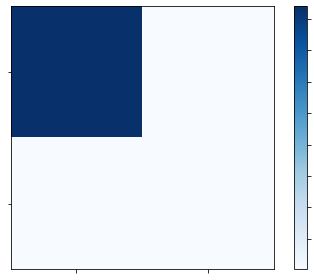

best fold 1
KNN

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1691
           1       0.33      0.45      0.38        11

    accuracy                           0.99      1702
   macro avg       0.66      0.72      0.69      1702
weighted avg       0.99      0.99      0.99      1702

      Acuracy  Precision    Recall  F1-score    F-beta       MCC   TP      TN  \
KNN  0.990599   0.333333  0.454545  0.384615  0.423729  0.384641  5.0  1681.0   

     ROC Curve  
KNN   0.724316  
Confusion matrix, without normalization
[[1681   10]
 [   6    5]]


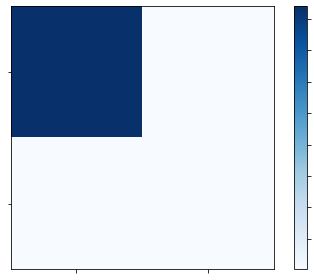

Tempo gasto fold 1 - 00:00:00
For fold 2:
KNN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.60      0.82      0.69        11

    accuracy                           1.00      1702
   macro avg       0.80      0.91      0.84      1702
weighted avg       1.00      1.00      1.00      1702

     Acuracy  Precision    Recall  F1-score    F-beta       MCC   TP      TN  \
KNN   0.9953        0.6  0.818182  0.692308  0.762712  0.698437  9.0  1685.0   

     ROC Curve  
KNN   0.907317  
Confusion matrix, without normalization
[[1685    6]
 [   2    9]]


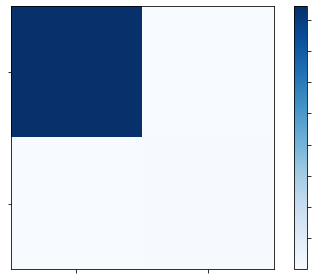

best fold 2
KNN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.60      0.82      0.69        11

    accuracy                           1.00      1702
   macro avg       0.80      0.91      0.84      1702
weighted avg       1.00      1.00      1.00      1702

     Acuracy  Precision    Recall  F1-score    F-beta       MCC   TP      TN  \
KNN   0.9953        0.6  0.818182  0.692308  0.762712  0.698437  9.0  1685.0   

     ROC Curve  
KNN   0.907317  
Confusion matrix, without normalization
[[1685    6]
 [   2    9]]


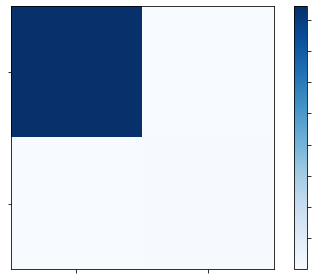

Tempo gasto fold 2 - 00:00:00
For fold 3:
KNN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.56      0.45      0.50        11

    accuracy                           0.99      1702
   macro avg       0.78      0.73      0.75      1702
weighted avg       0.99      0.99      0.99      1702

      Acuracy  Precision    Recall  F1-score    F-beta       MCC   TP      TN  \
KNN  0.994125   0.555556  0.454545       0.5  0.471698  0.499608  5.0  1687.0   

     ROC Curve  
KNN    0.72609  
Confusion matrix, without normalization
[[1687    4]
 [   6    5]]


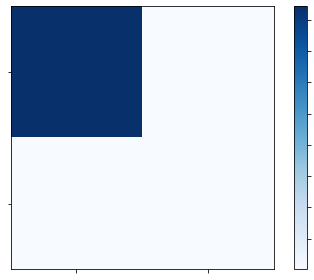

Tempo gasto fold 3 - 00:00:00
For fold 4:
KNN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.88      0.58      0.70        12

    accuracy                           1.00      1702
   macro avg       0.94      0.79      0.85      1702
weighted avg       1.00      1.00      1.00      1702

      Acuracy  Precision    Recall  F1-score  F-beta       MCC   TP      TN  \
KNN  0.996475      0.875  0.583333       0.7   0.625  0.712867  7.0  1689.0   

     ROC Curve  
KNN   0.791371  
Confusion matrix, without normalization
[[1689    1]
 [   5    7]]


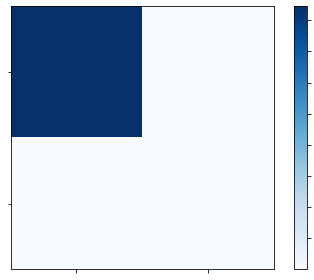

Tempo gasto fold 4 - 00:00:00
For fold 5:
KNN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.71      0.42      0.53        12

    accuracy                           0.99      1702
   macro avg       0.86      0.71      0.76      1702
weighted avg       0.99      0.99      0.99      1702

      Acuracy  Precision    Recall  F1-score    F-beta       MCC   TP      TN  \
KNN  0.994712   0.714286  0.416667  0.526316  0.454545  0.543192  5.0  1688.0   

     ROC Curve  
KNN   0.707742  
Confusion matrix, without normalization
[[1688    2]
 [   7    5]]


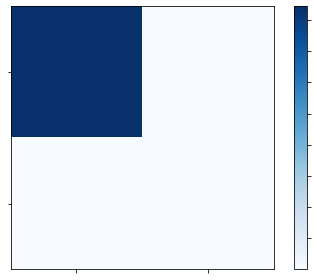

Tempo gasto fold 5 - 00:00:00
For fold 6:
KNN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.80      0.33      0.47        12

    accuracy                           0.99      1702
   macro avg       0.90      0.67      0.73      1702
weighted avg       0.99      0.99      0.99      1702

      Acuracy  Precision    Recall  F1-score    F-beta       MCC   TP      TN  \
KNN  0.994712        0.8  0.333333  0.470588  0.377358  0.514417  4.0  1689.0   

     ROC Curve  
KNN   0.666371  
Confusion matrix, without normalization
[[1689    1]
 [   8    4]]


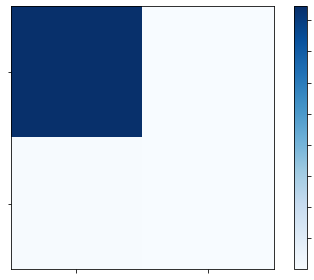

Tempo gasto fold 6 - 00:00:00
For fold 7:
KNN

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       0.50      0.08      0.14        12

    accuracy                           0.99      1702
   macro avg       0.75      0.54      0.57      1702
weighted avg       0.99      0.99      0.99      1702

      Acuracy  Precision    Recall  F1-score  F-beta       MCC   TP      TN  \
KNN  0.992949        0.5  0.083333  0.142857     0.1  0.202078  1.0  1689.0   

     ROC Curve  
KNN   0.541371  
Confusion matrix, without normalization
[[1689    1]
 [  11    1]]


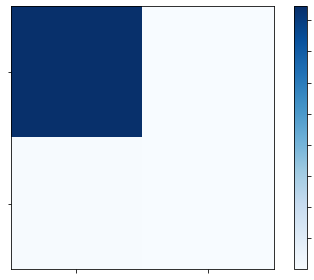

Tempo gasto fold 7 - 00:00:01
For fold 8:
KNN

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       1.00      0.08      0.15        12

    accuracy                           0.99      1702
   macro avg       1.00      0.54      0.58      1702
weighted avg       0.99      0.99      0.99      1702

      Acuracy  Precision    Recall  F1-score    F-beta      MCC   TP      TN  \
KNN  0.993537        1.0  0.083333  0.153846  0.102041  0.28774  1.0  1690.0   

     ROC Curve  
KNN   0.541667  
Confusion matrix, without normalization
[[1690    0]
 [  11    1]]


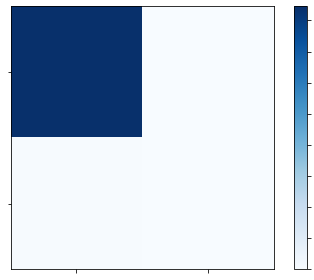

Tempo gasto fold 8 - 00:00:00
For fold 9:
KNN

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       0.00      0.00      0.00        12

    accuracy                           0.99      1702
   macro avg       0.50      0.50      0.50      1702
weighted avg       0.99      0.99      0.99      1702

      Acuracy  Precision  Recall  F1-score  F-beta  MCC   TP      TN  \
KNN  0.992949        0.0     0.0       0.0     0.0  0.0  0.0  1690.0   

     ROC Curve  
KNN        0.5  
Confusion matrix, without normalization
[[1690    0]
 [  12    0]]


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.

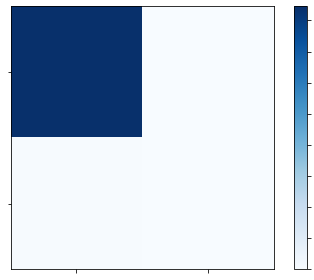

Tempo gasto fold 9 - 00:00:00
For fold 10:
KNN

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       0.75      0.25      0.38        12

    accuracy                           0.99      1702
   macro avg       0.87      0.62      0.69      1702
weighted avg       0.99      0.99      0.99      1702

      Acuracy  Precision  Recall  F1-score    F-beta       MCC   TP      TN  \
KNN  0.994125       0.75    0.25     0.375  0.288462  0.430969  3.0  1689.0   

     ROC Curve  
KNN   0.624704  
Confusion matrix, without normalization
[[1689    1]
 [   9    3]]


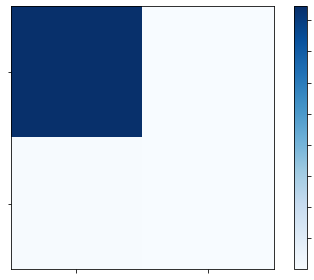

Tempo gasto fold 10 - 00:00:00



(      Acuracy  Precision   Recall  F1-score    F-beta       MCC    TP  \
 KNN  0.993948   0.606061  0.34188  0.437158  0.374532  0.430969  40.0   
 
           TN  ROC Curve  
 KNN  16877.0   0.670171  ,
          Acuracy  Precision    Recall  F1-score    F-beta       MCC    TP  \
 Fold1   0.990599   0.333333  0.454545  0.384615  0.423729  0.384641   5.0   
 Fold2   0.995300   0.600000  0.818182  0.692308  0.762712  0.698437  14.0   
 Fold3   0.994125   0.555556  0.454545  0.500000  0.471698  0.499608  19.0   
 Fold4   0.996475   0.875000  0.583333  0.700000  0.625000  0.712867  26.0   
 Fold5   0.994712   0.714286  0.416667  0.526316  0.454545  0.543192  31.0   
 Fold6   0.994712   0.800000  0.333333  0.470588  0.377358  0.514417  35.0   
 Fold7   0.992949   0.500000  0.083333  0.142857  0.100000  0.202078  36.0   
 Fold8   0.993537   1.000000  0.083333  0.153846  0.102041  0.287740  37.0   
 Fold9   0.992949   0.000000  0.000000  0.000000  0.000000  0.000000  37.0   
 Fold10  0.9941

In [506]:
cv(X,y,knn,'KNN')

### Decision Tree

For fold 1:
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1691
           1       0.25      0.27      0.26        11

    accuracy                           0.99      1702
   macro avg       0.62      0.63      0.63      1702
weighted avg       0.99      0.99      0.99      1702

                Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
Decision Tree  0.990012       0.25  0.272727   0.26087  0.267857  0.256097   

                TP      TN  ROC Curve  
Decision Tree  3.0  1682.0   0.633702  
[[1682    9]
 [   8    3]]


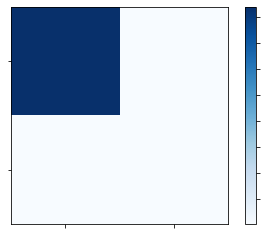

best fold 1
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1691
           1       0.25      0.27      0.26        11

    accuracy                           0.99      1702
   macro avg       0.62      0.63      0.63      1702
weighted avg       0.99      0.99      0.99      1702

                Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
Decision Tree  0.990012       0.25  0.272727   0.26087  0.267857  0.256097   

                TP      TN  ROC Curve  
Decision Tree  3.0  1682.0   0.633702  
[[1682    9]
 [   8    3]]


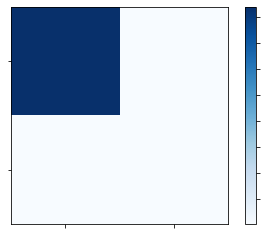

Tempo gasto fold 1 - 00:00:00
For fold 2:
Decision Tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.53      0.73      0.62        11

    accuracy                           0.99      1702
   macro avg       0.77      0.86      0.81      1702
weighted avg       1.00      0.99      0.99      1702

                Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
Decision Tree  0.994125   0.533333  0.727273  0.615385  0.677966  0.619988   

                TP      TN  ROC Curve  
Decision Tree  8.0  1684.0   0.861567  
[[1684    7]
 [   3    8]]


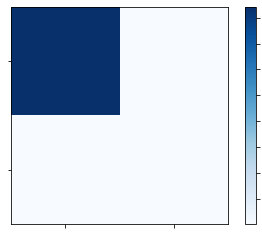

best fold 2
Decision Tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1691
           1       0.53      0.73      0.62        11

    accuracy                           0.99      1702
   macro avg       0.77      0.86      0.81      1702
weighted avg       1.00      0.99      0.99      1702

                Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
Decision Tree  0.994125   0.533333  0.727273  0.615385  0.677966  0.619988   

                TP      TN  ROC Curve  
Decision Tree  8.0  1684.0   0.861567  
[[1684    7]
 [   3    8]]


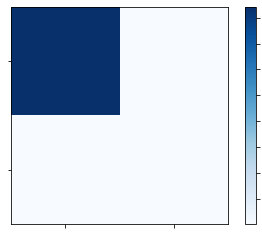

Tempo gasto fold 2 - 00:00:00
For fold 3:
Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1691
           1       0.31      0.36      0.33        11

    accuracy                           0.99      1702
   macro avg       0.65      0.68      0.66      1702
weighted avg       0.99      0.99      0.99      1702

                Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
Decision Tree  0.990599   0.307692  0.363636  0.333333  0.350877  0.329796   

                TP      TN  ROC Curve  
Decision Tree  4.0  1682.0   0.679157  
[[1682    9]
 [   7    4]]


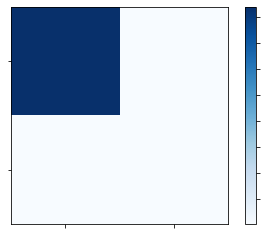

Tempo gasto fold 3 - 00:00:00
For fold 4:
Decision Tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.88      0.58      0.70        12

    accuracy                           1.00      1702
   macro avg       0.94      0.79      0.85      1702
weighted avg       1.00      1.00      1.00      1702

                Acuracy  Precision    Recall  F1-score  F-beta       MCC   TP  \
Decision Tree  0.996475      0.875  0.583333       0.7   0.625  0.712867  7.0   

                   TN  ROC Curve  
Decision Tree  1689.0   0.791371  
[[1689    1]
 [   5    7]]


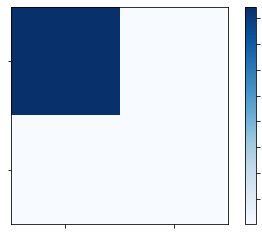

Tempo gasto fold 4 - 00:00:00
For fold 5:
Decision Tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1690
           1       0.78      0.58      0.67        12

    accuracy                           1.00      1702
   macro avg       0.89      0.79      0.83      1702
weighted avg       1.00      1.00      1.00      1702

                Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
Decision Tree  0.995887   0.777778  0.583333  0.666667  0.614035  0.671613   

                TP      TN  ROC Curve  
Decision Tree  7.0  1688.0   0.791075  
[[1688    2]
 [   5    7]]


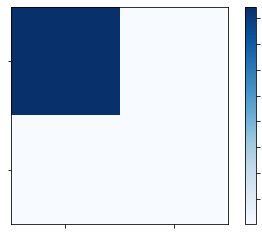

Tempo gasto fold 5 - 00:00:00
For fold 6:
Decision Tree

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       0.67      0.17      0.27        12

    accuracy                           0.99      1702
   macro avg       0.83      0.58      0.63      1702
weighted avg       0.99      0.99      0.99      1702

                Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
Decision Tree  0.993537   0.666667  0.166667  0.266667  0.196078  0.331269   

                TP      TN  ROC Curve  
Decision Tree  2.0  1689.0   0.583037  
[[1689    1]
 [  10    2]]


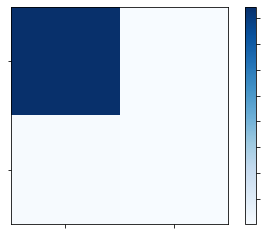

Tempo gasto fold 6 - 00:00:00
For fold 7:
Decision Tree

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       0.00      0.00      0.00        12

    accuracy                           0.99      1702
   macro avg       0.50      0.50      0.50      1702
weighted avg       0.99      0.99      0.99      1702

                Acuracy  Precision  Recall  F1-score  F-beta  MCC   TP  \
Decision Tree  0.992949        0.0     0.0       0.0     0.0  0.0  0.0   

                   TN  ROC Curve  
Decision Tree  1690.0        0.5  
[[1690    0]
 [  12    0]]


/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/julia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.

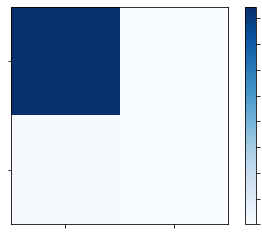

Tempo gasto fold 7 - 00:00:00
For fold 8:
Decision Tree

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       1.00      0.08      0.15        12

    accuracy                           0.99      1702
   macro avg       1.00      0.54      0.58      1702
weighted avg       0.99      0.99      0.99      1702

                Acuracy  Precision    Recall  F1-score    F-beta      MCC  \
Decision Tree  0.993537        1.0  0.083333  0.153846  0.102041  0.28774   

                TP      TN  ROC Curve  
Decision Tree  1.0  1690.0   0.541667  
[[1690    0]
 [  11    1]]


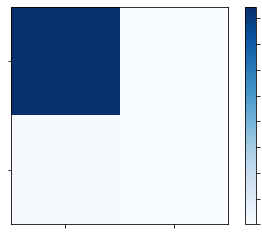

Tempo gasto fold 8 - 00:00:00
For fold 9:
Decision Tree

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       0.50      0.08      0.14        12

    accuracy                           0.99      1702
   macro avg       0.75      0.54      0.57      1702
weighted avg       0.99      0.99      0.99      1702

                Acuracy  Precision    Recall  F1-score  F-beta       MCC   TP  \
Decision Tree  0.992949        0.5  0.083333  0.142857     0.1  0.202078  1.0   

                   TN  ROC Curve  
Decision Tree  1689.0   0.541371  
[[1689    1]
 [  11    1]]


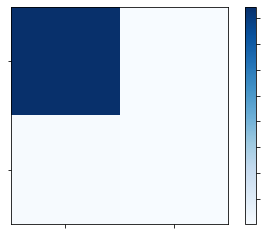

Tempo gasto fold 9 - 00:00:00
For fold 10:
Decision Tree

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1690
           1       0.67      0.17      0.27        12

    accuracy                           0.99      1702
   macro avg       0.83      0.58      0.63      1702
weighted avg       0.99      0.99      0.99      1702

                Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
Decision Tree  0.993537   0.666667  0.166667  0.266667  0.196078  0.331269   

                TP      TN  ROC Curve  
Decision Tree  2.0  1689.0   0.583037  
[[1689    1]
 [  10    2]]


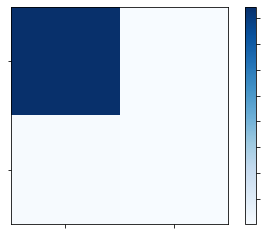

Tempo gasto fold 10 - 00:00:00



(                Acuracy  Precision    Recall  F1-score    F-beta       MCC  \
 Decision Tree  0.993361   0.530303  0.299145  0.382514  0.327715  0.331269   
 
                  TP       TN  ROC Curve  
 Decision Tree  35.0  16872.0   0.648656  ,
          Acuracy  Precision    Recall  F1-score    F-beta       MCC    TP  \
 Fold1   0.990012   0.250000  0.272727  0.260870  0.267857  0.256097   3.0   
 Fold2   0.994125   0.533333  0.727273  0.615385  0.677966  0.619988  11.0   
 Fold3   0.990599   0.307692  0.363636  0.333333  0.350877  0.329796  15.0   
 Fold4   0.996475   0.875000  0.583333  0.700000  0.625000  0.712867  22.0   
 Fold5   0.995887   0.777778  0.583333  0.666667  0.614035  0.671613  29.0   
 Fold6   0.993537   0.666667  0.166667  0.266667  0.196078  0.331269  31.0   
 Fold7   0.992949   0.000000  0.000000  0.000000  0.000000  0.000000  31.0   
 Fold8   0.993537   1.000000  0.083333  0.153846  0.102041  0.287740  32.0   
 Fold9   0.992949   0.500000  0.083333  0.142857  0

In [451]:
cv(X,y,dct,'Decision Tree')

In [434]:
# Visualize Decision Tree
#from sklearn.tree import export_graphviz

columns = ['balance_ether','total_transactions', 'sent', 'received', 'n_contracts_sent', 'n_contracts_received']
# Creates dot file named tree.dot
tree.export_graphviz(
            dct,
            out_file =  "myTreeName.dot",
            feature_names = columns,
            #class_names = classes,
            filled = True,
            rounded = True)

**Feature Importance**

In [507]:
importances = pd.DataFrame({'feature':['balance_ether','total_transactions', 'sent', 'received', 'n_contracts_sent', 
                                       'n_contracts_received'],
                            'importance':np.round(dct.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
3,received,0.301
1,total_transactions,0.299
0,balance_ether,0.296
2,sent,0.052
4,n_contracts_sent,0.052
5,n_contracts_received,0.000
